## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Read Data

In [2]:
data_path = '/content/Tabinda Qudrat - online education'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### Generate Data Profiling Report

In [3]:
!pip install pandas_profiling

In [4]:
from ydata_profiling import ProfileReport
Report = ProfileReport(data)
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding

Choose a suitable encoding technique for the columns.

In [5]:
# Display data types and unique values for each column
print(data.dtypes)
print("\nUnique values in each categorical column:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")


Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

Unique values in each categorical column:
Gender: ['Boy' 'Girl']
Age: ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level: ['University' 'College' 'School']
Institution Type: ['Non Government' 'Government']
IT Student: ['No' 'Yes']
Location: ['Yes' 'No']
Load-shedding: ['Low' 'High']
Financial Condition: ['Mid' 'Poor' 'Rich']
Internet Type: ['Wifi' 'Mobile Data']
Network Type: ['4G' '3G' '2G']
Class Duration: ['3-6' '1-3' '0']
Self Lms: ['No' 'Yes']
Device: ['Tab' 'Mobile' 'Computer']
Adaptivity Level: ['Moderate' 'Low' 'High']


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Label encoding for binary categorical variables
label_cols = ['Gender', 'IT Student', 'Location', 'Self Lms']
label_encoder = LabelEncoder()
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [13]:
# Separate the target variable before applying any transformations
Y = data['Adaptivity Level']
data_features = data.drop('Adaptivity Level', axis=1)  # drop the target column from the data

# Define the columns to be one-hot encoded
onehot_cols = [
    'Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
    'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
    'Network Type', 'Class Duration', 'Self Lms', 'Device'
]

# Create a transformer for one-hot encoding
transformer = ColumnTransformer(
    [("onehot", OneHotEncoder(), onehot_cols)],
    remainder='passthrough'
)

# Fit and transform the feature data only
data_transformed = transformer.fit_transform(data_features)

# Fetch the feature names from the transformer
feature_names = transformer.get_feature_names_out()

# Create DataFrame from transformed feature data
X = pd.DataFrame(data_transformed, columns=feature_names)

# Check if all columns in X are numeric
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   onehot__Gender_0                         1205 non-null   float64
 1   onehot__Gender_1                         1205 non-null   float64
 2   onehot__Age_0                            1205 non-null   float64
 3   onehot__Age_1                            1205 non-null   float64
 4   onehot__Age_2                            1205 non-null   float64
 5   onehot__Age_3                            1205 non-null   float64
 6   onehot__Age_4                            1205 non-null   float64
 7   onehot__Age_5                            1205 non-null   float64
 8   onehot__Education Level_College          1205 non-null   float64
 9   onehot__Education Level_School           1205 non-null   float64
 10  onehot__Education Level_University       1205 no

In [8]:
# Ordinal encoding for ordinal data
# Mapping for ordinal features
age_mapping = {'1-5': 0, '6-10': 1, '11-15': 2, '16-20': 3, '21-25': 4, '26-30': 5}
class_duration_mapping = {'0': 0, '1-3': 1, '3-6': 2}

data['Age'] = data['Age'].map(age_mapping)
data['Class Duration'] = data['Class Duration'].map(class_duration_mapping)

### Check distribution

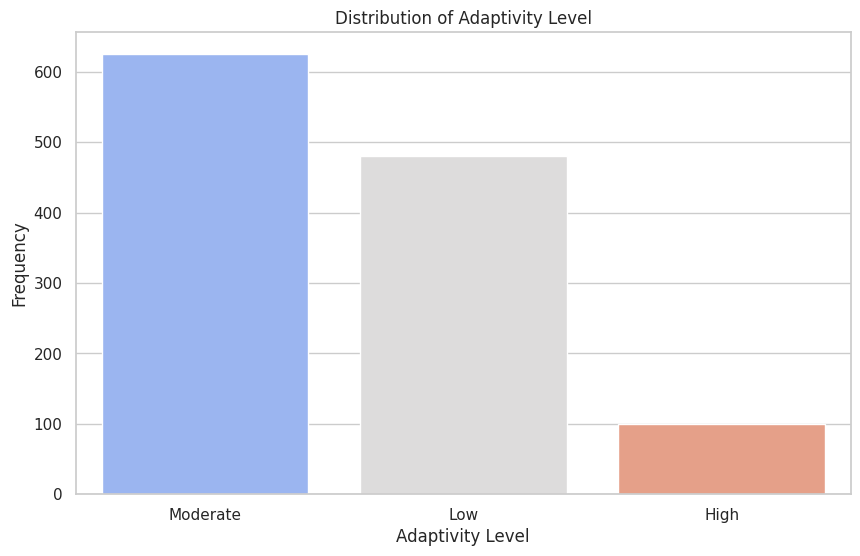

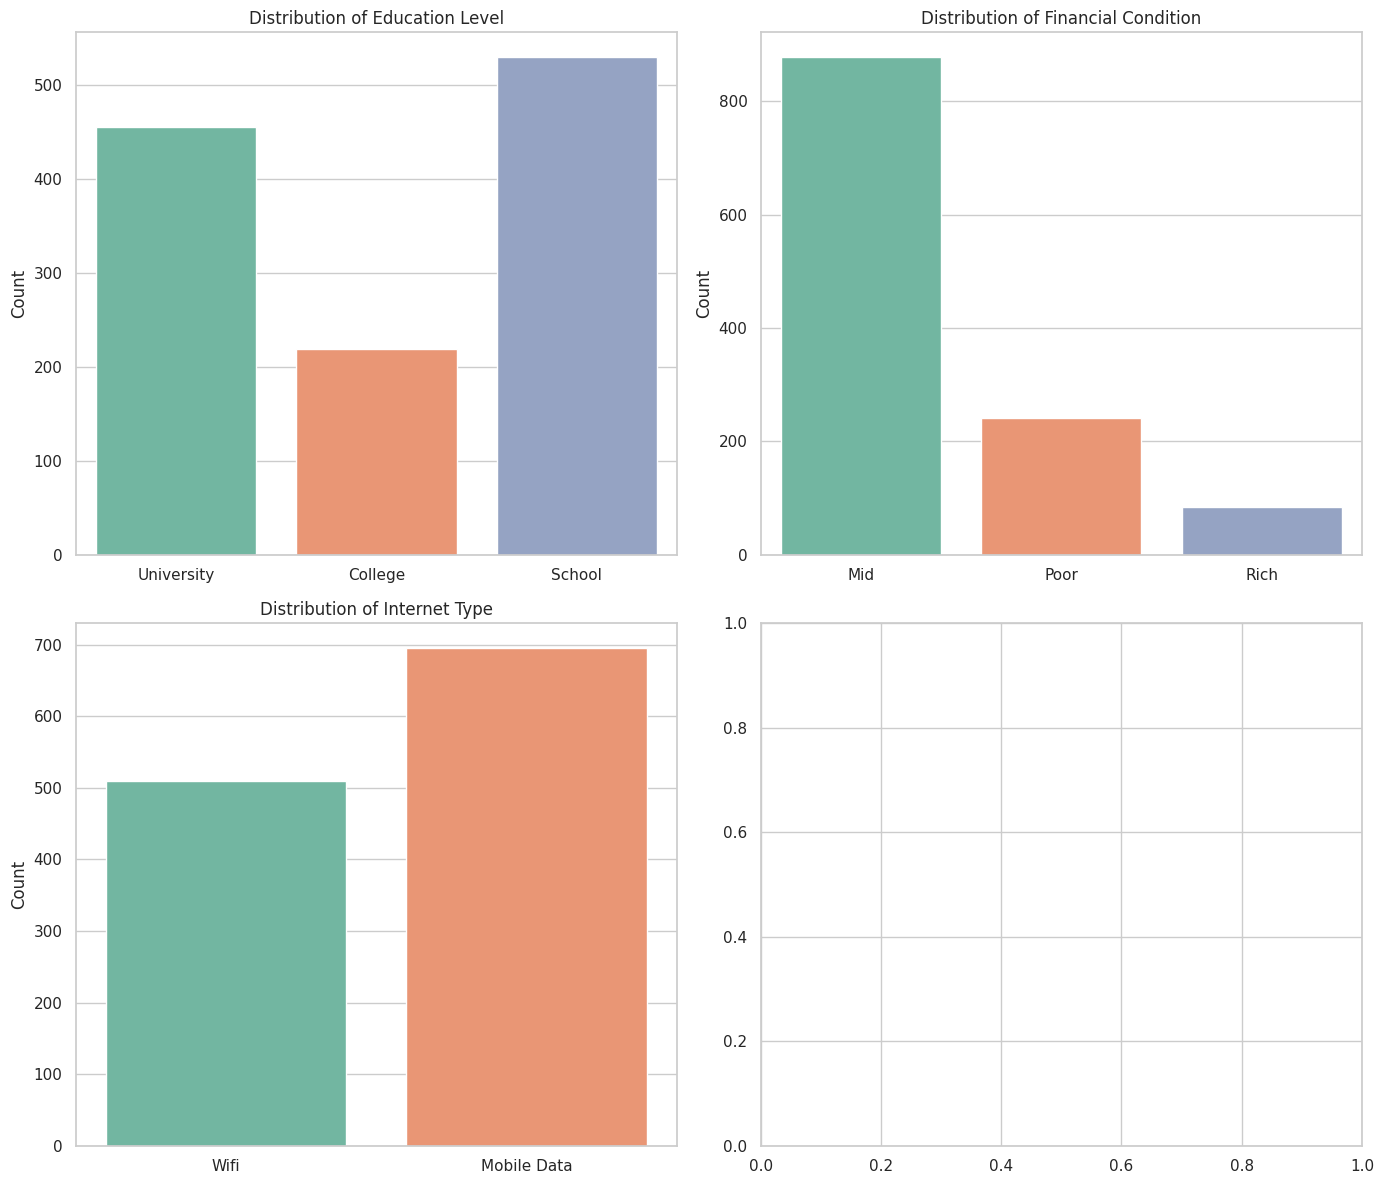

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualizing the distribution of 'Adaptivity Level'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Adaptivity Level', palette='coolwarm')
plt.title('Distribution of Adaptivity Level')
plt.xlabel('Adaptivity Level')
plt.ylabel('Frequency')
plt.show()

# Checking distributions of other key categorical variables
key_categoricals = ['Education Level', 'Financial Condition', 'Internet Type']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(key_categoricals):
    sns.countplot(data=data, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


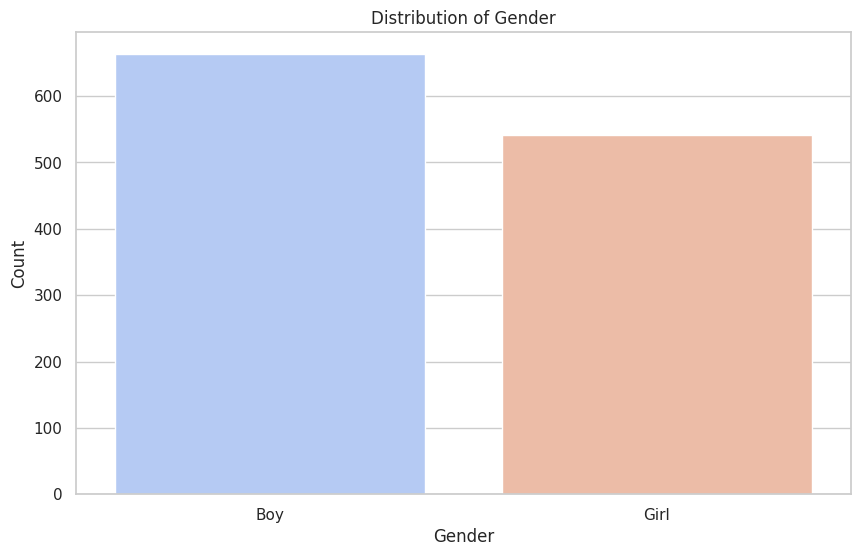

In [10]:
# Visualizing the distribution of 'Gender' with clear labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', palette='coolwarm')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Assigning explicit labels to the x-ticks for clarity
plt.xticks([0, 1], ['Boy', 'Girl'])
plt.show()


# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [15]:
#Did it in the one hot encoding section.


### Feature Scaling

In [14]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for further use if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the DataFrame to check it
print(X_scaled_df.head())

   onehot__Gender_0  onehot__Gender_1  onehot__Age_0  onehot__Age_1  \
0          0.904155         -0.904155      -0.268447      -0.210224   
1         -1.106005          1.106005      -0.268447      -0.210224   
2         -1.106005          1.106005      -0.268447      -0.210224   
3         -1.106005          1.106005      -0.268447      -0.210224   
4         -1.106005          1.106005      -0.268447      -0.210224   

   onehot__Age_2  onehot__Age_3  onehot__Age_4  onehot__Age_5  \
0      -0.643676      -0.547624       1.490612      -0.244554   
1      -0.643676      -0.547624       1.490612      -0.244554   
2      -0.643676       1.826070      -0.670865      -0.244554   
3       1.553576      -0.547624      -0.670865      -0.244554   
4      -0.643676       1.826070      -0.670865      -0.244554   

   onehot__Education Level_College  onehot__Education Level_School  ...  \
0                        -0.471285                       -0.886107  ...   
1                        -0.4712

### Train Test Split

In [16]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y, test_size=0.3, random_state=42)

# X_train and Y_train are the features and target variable for the training set
# X_test and Y_test are the features and target variable for the testing set

In [17]:
# Display the sizes of the train and test datasets to verify the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (843, 35)
Testing set size: (362, 35)


# KNN

In [18]:
#Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # you can adjust the number of neighbors based on validation


In [19]:
# Train the model using the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [20]:
# Predict the Adaptivity Level on the testing set
Y_pred = knn.predict(X_test)

In [23]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
 [[ 17   3  19]
 [ 11 101  42]
 [  2  25 142]]

Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.44      0.49        39
         Low       0.78      0.66      0.71       154
    Moderate       0.70      0.84      0.76       169

    accuracy                           0.72       362
   macro avg       0.68      0.64      0.66       362
weighted avg       0.72      0.72      0.71       362

Accuracy Score: 0.7182320441988951


#### Check different distance metric

**Euclidean**

In [22]:
# Initialize the KNN model with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model using the training data
knn_euclidean.fit(X_train, Y_train)

# Predict the Adaptivity Level on the testing set
Y_pred_euclidean = knn_euclidean.predict(X_test)

# Evaluate the model using Euclidean distance
print("Euclidean Distance - Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_euclidean))
print("\nEuclidean Distance - Classification Report:\n", classification_report(Y_test, Y_pred_euclidean))
print("Euclidean Distance - Accuracy Score:", accuracy_score(Y_test, Y_pred_euclidean))

Euclidean Distance - Confusion Matrix:
 [[ 17   3  19]
 [ 11 101  42]
 [  2  25 142]]

Euclidean Distance - Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.44      0.49        39
         Low       0.78      0.66      0.71       154
    Moderate       0.70      0.84      0.76       169

    accuracy                           0.72       362
   macro avg       0.68      0.64      0.66       362
weighted avg       0.72      0.72      0.71       362

Euclidean Distance - Accuracy Score: 0.7182320441988951


**Manhattan**

In [24]:
# Initialize the KNN model with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the model using the training data
knn_manhattan.fit(X_train, Y_train)

# Predict the Adaptivity Level on the testing set
Y_pred_manhattan = knn_manhattan.predict(X_test)

# Evaluate the model using Manhattan distance
print("Manhattan Distance - Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_manhattan))
print("\nManhattan Distance - Classification Report:\n", classification_report(Y_test, Y_pred_manhattan))
print("Manhattan Distance - Accuracy Score:", accuracy_score(Y_test, Y_pred_manhattan))

Manhattan Distance - Confusion Matrix:
 [[ 17   3  19]
 [ 11  97  46]
 [  2  23 144]]

Manhattan Distance - Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.44      0.49        39
         Low       0.79      0.63      0.70       154
    Moderate       0.69      0.85      0.76       169

    accuracy                           0.71       362
   macro avg       0.68      0.64      0.65       362
weighted avg       0.72      0.71      0.71       362

Manhattan Distance - Accuracy Score: 0.712707182320442


# Decision Tree

**Using Entropy**

In [25]:
# Initialize the Decision Tree model with the entropy criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
# Train the model using the training data
dt_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
# Predict the Adaptivity Level on the testing set
Y_pred_dt_entropy = dt_entropy.predict(X_test)

In [28]:
# Evaluate the model
print("Decision Tree using Entropy - Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt_entropy))
print("\nDecision Tree using Entropy - Classification Report:\n", classification_report(Y_test, Y_pred_dt_entropy))
print("Decision Tree using Entropy - Accuracy Score:", accuracy_score(Y_test, Y_pred_dt_entropy))

Decision Tree using Entropy - Confusion Matrix:
 [[ 27   0  12]
 [  3 140  11]
 [  1  13 155]]

Decision Tree using Entropy - Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.69      0.77        39
         Low       0.92      0.91      0.91       154
    Moderate       0.87      0.92      0.89       169

    accuracy                           0.89       362
   macro avg       0.89      0.84      0.86       362
weighted avg       0.89      0.89      0.89       362

Decision Tree using Entropy - Accuracy Score: 0.8895027624309392


**Use Gini Index**

In [29]:
# Initialize the Decision Tree model with the Gini index criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)


In [30]:
# Train the model using the training data
dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Predict the Adaptivity Level on the testing set
Y_pred_dt_gini = dt_gini.predict(X_test)

In [32]:
# Evaluate the model
print("Decision Tree using Gini Index - Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt_gini))
print("\nDecision Tree using Gini Index - Classification Report:\n", classification_report(Y_test, Y_pred_dt_gini))
print("Decision Tree using Gini Index - Accuracy Score:", accuracy_score(Y_test, Y_pred_dt_gini))

Decision Tree using Gini Index - Confusion Matrix:
 [[ 27   0  12]
 [  3 138  13]
 [  2  11 156]]

Decision Tree using Gini Index - Classification Report:
               precision    recall  f1-score   support

        High       0.84      0.69      0.76        39
         Low       0.93      0.90      0.91       154
    Moderate       0.86      0.92      0.89       169

    accuracy                           0.89       362
   macro avg       0.88      0.84      0.85       362
weighted avg       0.89      0.89      0.89       362

Decision Tree using Gini Index - Accuracy Score: 0.8867403314917127


# All the Best!